In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_scheduler.utils as rsUtils
import sqlite3

In [2]:
filename = 'too_elab_r64_d3_ugrizy_v3.4_10yrs.db'
name = os.path.basename(filename).replace('.db','')
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)

In [4]:
bundle_list = []

# col here could be anything
metric = maf.metrics.CountMetric(col=['night'], metric_name='Nvis')
# Select all the visits. Could do something like 'filter="r"' 
sql = 'note like "ToO%%"'
slicer = maf.slicers.HealpixSlicer()
plot_dict = {}
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name, plot_dict=plot_dict))


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


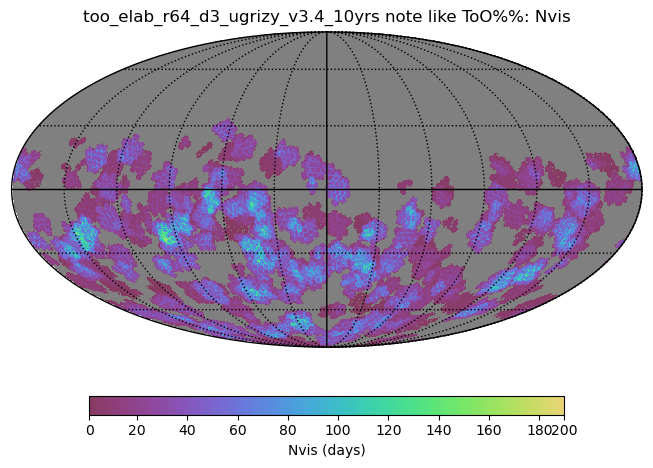

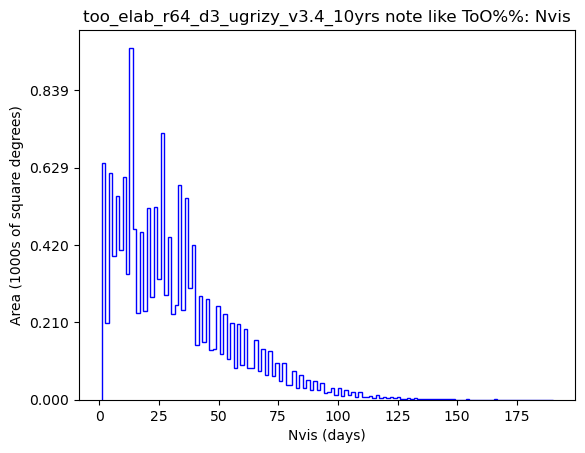

In [5]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, filename, out_dir=out_dir, results_db=results_db)
bg.run_all()
bg.plot_all(closefigs=False)


In [9]:
con = sqlite3.connect(filename)

df = pd.read_sql('select count(mjd_start) from events;', con)
print('Number ToO events generated = ',df.values[0].max())


df = pd.read_sql('select distinct(note) from observations where note like "%%_t1"', con)
print('Number of t1 blobs taken = ', np.size(df.values))


df = pd.read_sql('select distinct(note) from observations where note like "%%_t2"', con)
print('Number of t2 blobs taken = ', np.size(df.values))

df = pd.read_sql('select distinct(note) from observations where note like "%%_t4"', con)
print('Number of t4 taken = ', np.size(df.values))

df = pd.read_sql('select distinct(note) from observations where note like "%%_t24"', con)
print('Number of t24 blobs taken = ', np.size(df.values))

df = pd.read_sql('select distinct(note) from observations where note like "%%_t48"', con)
print('Number of t48 blobs taken = ', np.size(df.values))


df = pd.read_sql('select count(night) from observations where note like "%%_t%%"', con)
print('Number ToO visits = ',df.values[0].max())


con.close()

Number ToO events generated =  640
Number of t1 blobs taken =  223
Number of t2 blobs taken =  199
Number of t4 taken =  146
Number of t24 blobs taken =  145
Number of t48 blobs taken =  107
Number ToO visits =  116477
